In [1]:
### Importing required packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear 
# regression since linear regression presumes that the data is linear. Let's learn about non linear regressions and apply 
# an example in python. In this notebook, we fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 
# to 2014.

In [5]:
## SHOWING THE NON-LINEAR FUNCTIONS

In [6]:
# 1. Quadratic Function

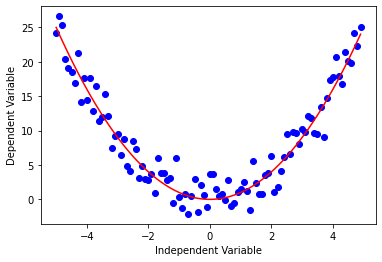

In [7]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [8]:
# 2. Exponential Function

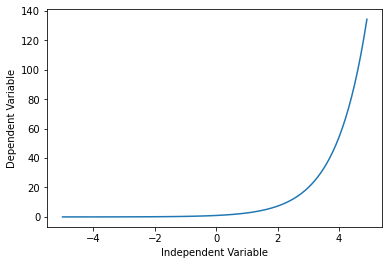

In [9]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [10]:
# 3. Logarithmic Function

C:\Users\Dell\AppData\Local\Temp/ipykernel_10044/2233958358.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


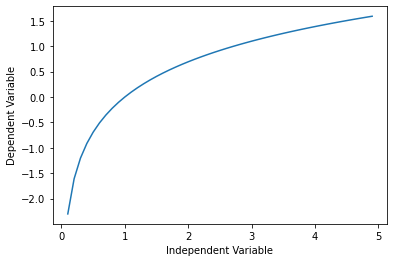

In [11]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [12]:
# 4. Sigmoidal/Logistic Function

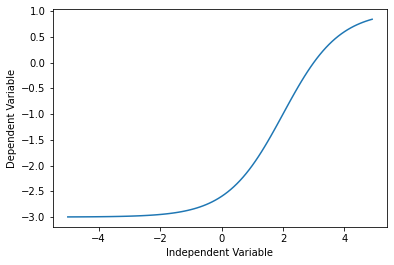

In [13]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [14]:
# Non-Linear Regression example

In [15]:
# For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 
# 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding 
# annual gross domestic income in US dollars for that year.

# Let's download and import the data on China's GDP using pandas read_csv() method.

In [16]:
df = pd.read_csv("china_gdp.csv")

# take a look at the dataset
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [17]:
# Visualize the Dataset

# This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off 
# slow, then from 2005 on forward, the growth is very significant. And finally, it decelerates slightly in the 2010s.

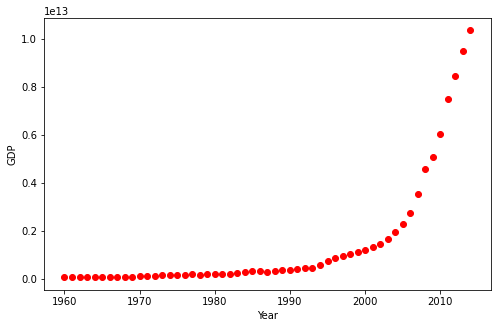

In [18]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [19]:
# Choosing a model

# From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has 
# the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as 
# illustrated below:

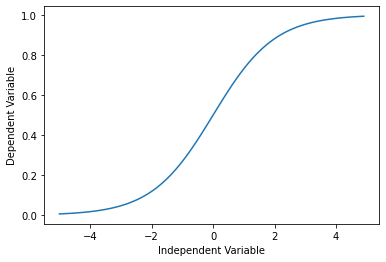

In [20]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [21]:
# Building The Model

# Now, let's build our regression model and initialize its parameters.

In [22]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

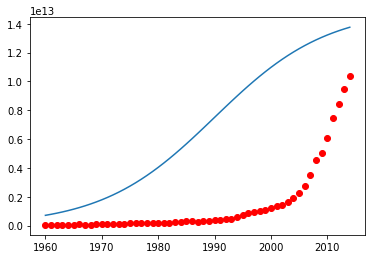

In [23]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [24]:
# Our task here is to find the best parameters for our model. Lets first normalize our x and y:

# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [25]:
# How we find the best parameters for our fit line?

# we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the 
# parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

# popt are our optimized parameters.

In [26]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


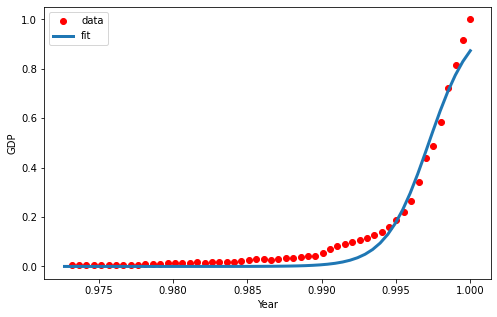

In [27]:
# Now we plot our resulting regression model.

x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [29]:
# build the model using train set
popt, pcov = curve_fit(sigmoid, X_train, y_train)

# predict using test set
y_pred = sigmoid(X_test, *popt)

# evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
# display
print("Mean absolute error : " + str(mae))
print("Mean squared error : " + str(mse))
print("r2_score : " + str(score))

Mean absolute error : 6.816782828315826e-10
Mean squared error : 7.75095678657296e-19
r2_score : 1.0
